# Import the cleaned data (see Preprocessing.py for more info)

In [18]:
from Preprocessing import getData
import numpy as np

x_train,x_val,x_test,y_train,y_val,y_test = getData()

print(x_train[0])

13990 new datasets created
2231 new datasets created
4210 new datasets created
[[-1.68e+00 -1.56e+00  8.59e-01 -1.02e+00  0.00e+00  0.00e+00 -1.05e+00
   2.11e-01 -6.36e-01 -3.55e-15  1.45e-01  4.18e-01 -7.66e-01 -9.84e-01
  -2.22e-16 -1.83e-01  1.16e+00 -3.30e-01 -6.87e-01 -2.71e-01 -1.04e-17
  -7.79e-01  0.00e+00  0.00e+00  1.01e+00  1.23e+00]]


In [19]:
print(f"train data: {len(x_train)}\t val data : {len(x_val)}\t test data: {len(x_test)}")
unique, counts = np.unique(y_train, return_counts=True)
print(f"Classes and count for x_train: {dict(zip(unique, counts))}")
print(x_train.shape)
most_probable_class = np.argmax(counts)

train data: 13990	 val data : 2231	 test data: 4210
Classes and count for x_train: {0: 3570, 1: 6928, 2: 3492}
(13990, 1, 26)


# Generate the model

In [20]:
from keras import layers
from keras.models import Sequential

In [21]:
print(x_train.shape)

model = Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# model.add(layers.LSTM(units=20, return_sequences=True))
# model.add(layers.LSTM(units=26, return_sequences=True))

model.add(layers.LSTM(units=20,activation='relu',return_sequences=True))
# model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=3,activation='softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



(13990, 1, 26)


In [22]:
rollingWindow = 1000
valWindow = 0
step = 500
from tqdm import tqdm
for i in tqdm(range(0,len(x_train) - rollingWindow-valWindow,step)):
    model.fit(x_train[i:i+rollingWindow], y_train[i:i+rollingWindow], epochs=1, verbose=0,validation_data=(x_train[i+rollingWindow:i+rollingWindow+valWindow], y_train[i+rollingWindow:i+rollingWindow+valWindow]))

evaluatation = model.evaluate(x_test, y_test,verbose=0)


print(f"\n\nEvaluation loss:  {evaluatation[0]} \t Evaluation accuracy: {evaluatation[1]}")

from sklearn.metrics import accuracy_score
base_line = accuracy_score(y_test, [most_probable_class]*len(y_test))
print(base_line)

100%|██████████| 26/26 [00:03<00:00,  6.50it/s]




Evaluation loss:  0.549850583076477 	 Evaluation accuracy: 0.7665083408355713
0.4750593824228028


[[5.92e-04 1.25e-01 4.08e-01]
 [1.15e-04 7.24e-02 3.94e-01]
 [2.58e-04 8.36e-02 4.10e-01]
 ...
 [3.25e-01 4.79e-02 5.67e-05]
 [4.12e-01 1.92e-02 2.84e-06]
 [4.71e-01 6.08e-03 4.15e-07]]


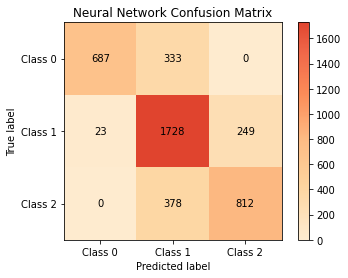

In [24]:
from sklearn_evaluation import plot
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = y_test

t = plot.confusion_matrix(y_true, y_pred)
t.set_title("Neural Network Confusion Matrix")
plt.show()